In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Description:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### About this file
1. Title: Haberman's Survival Data

2. Sources:
    (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu)
    (b) Date: March 4, 1999

3. Past Usage:

        (a) Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122.
        (b) Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83.
        (c) Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,Department of Statistics, University of Wisconsin, Madison, WI.

4. Relevant Information:
    The dataset contains cases from a study that was conducted between
    1958 and 1970 at the University of Chicago's Billings Hospital on
    the survival of patients who had undergone surgery for breast
    cancer.

5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. Attribute Information:
        (a) Age of patient at time of operation (numerical)
        (b) Patient's year of operation (year - 1900, numerical)
        (c) Number of positive axillary nodes detected (numerical)
        (d) Survival status (class attribute)
                1 = the patient survived 5 years or longer
                2 = the patient died within 5 year
8. Missing Attribute Values: None

file taken from 
https://www.kaggle.com/gilsousa/habermans-survival-data-set

In [2]:
hman = pd.read_csv('haberman.csv', header=None)

In [3]:
# Giving a name to the columns
hman.columns = ['age','Op_Year','axil_nodes','Survival_Status']

In [4]:
hman.head()

,age,Op_Year,axil_nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
print('There are a total of {} data points on {} features(Indipendent Variables)'.format(hman.shape[0],hman.shape[1]))
hman.shape

There are a total of 306 data points on 4 features(Indipendent Variables)


(306, 4)

In [6]:
# There are 225 cases of the patient survived 5 years or longer
# And 81 cases where the patient died within 5 year
hman.Survival_Status.value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

In [7]:
hman.describe()

,age,Op_Year,axil_nodes,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [8]:
hman.isnull().sum()

age                0
Op_Year            0
axil_nodes         0
Survival_Status    0
dtype: int64

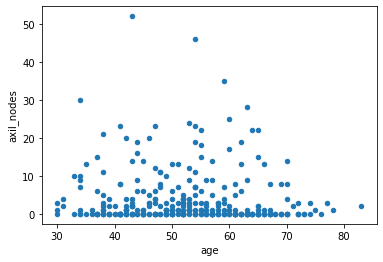

In [9]:
hman.plot(kind = 'scatter', x = 'age', y = 'axil_nodes')
plt.show()

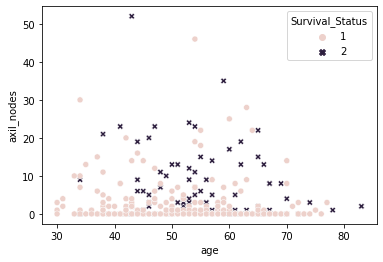

<Figure size 1800x720 with 0 Axes>

In [10]:
#the above graph is not giving much info
sns.scatterplot(data=hman ,x = 'age', y = 'axil_nodes', hue = 'Survival_Status', style="Survival_Status")
plt.figure(figsize=(25,10))
plt.show();

In [11]:
# not able to get any insignt on this graph aswell

C:\Users\Syed Murtuza Ali\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


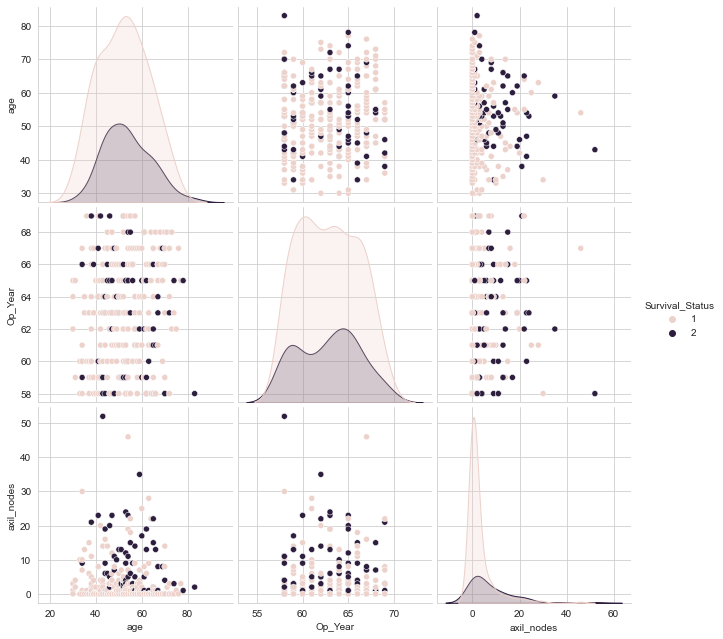

In [12]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(data=hman , hue = 'Survival_Status', size=3)
plt.show()

Observation :
1. It is observed that there are less cases in in people who are less than age 40 and also survival chances is also more.
2. This is also seen the cases are more in age between 40-60.
3. every year there are many cases of '1' and '2'

In [13]:
hman_1 = hman.loc[hman['Survival_Status'] == 1]
hman_2 = hman.loc[hman['Survival_Status'] == 2]
print(hman_1.shape , hman_2.shape)

(225, 4) (81, 4)


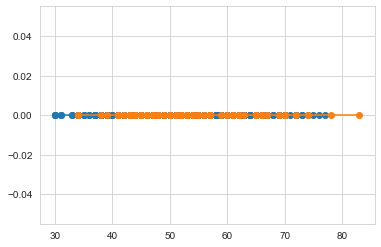

In [14]:
plt.plot(hman_1["age"], np.zeros_like(hman_1['age']), marker = 'o')
plt.plot(hman_2["age"], np.zeros_like(hman_2['age']),marker = 'o')
plt.show()
# dosent make any sence

### Univariate analysis - PDF , Histograms

C:\Users\Syed Murtuza Ali\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Syed Murtuza Ali\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Syed Murtuza Ali\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


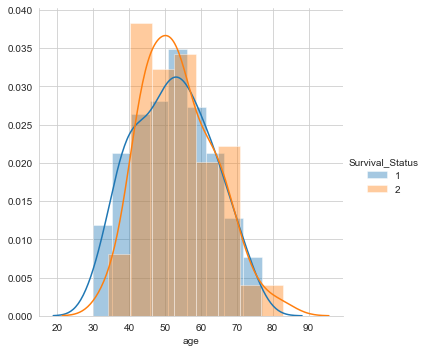

In [15]:
# sns.displot(data= hman , hue = 'Survival_Status', x = hman['age']);
# plt.show();

sns.FacetGrid(hman, hue="Survival_Status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();


C:\Users\Syed Murtuza Ali\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Syed Murtuza Ali\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Syed Murtuza Ali\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


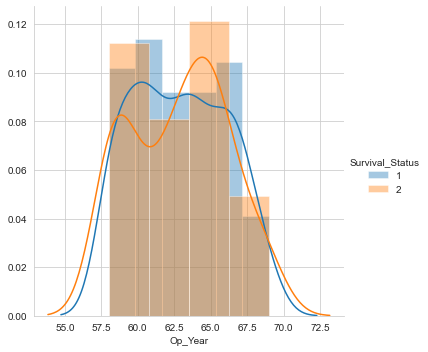

In [16]:
sns.FacetGrid(hman, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();
plt.show();

C:\Users\Syed Murtuza Ali\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Syed Murtuza Ali\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Syed Murtuza Ali\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


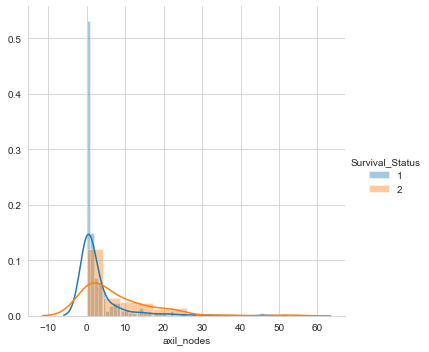

In [17]:
sns.FacetGrid(hman, hue="Survival_Status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.show();

1. All the Histograms and Probability distributions functions graphs heavily overlab on all the features, This is a very deadly disease. Only observations here we can make is people with 80 years of age dies with 100% propability.
2. other age group have fairly even chance to survive.
3. 0-10 nodes are very common among the all ages, the more the axil nodes the more cases of dead can be observed 

In [18]:
dead = hman.Survival_Status.value_counts()[2]
surv = hman.Survival_Status.value_counts()[1]
print('There are {}% people not surviving and {}% people surviving thru all age groups and all years combined.'
      .format(round((dead / hman.shape[0])*100,2),round((surv / hman.shape[0])*100,2)))

There are 26.47% people not surviving and 73.53% people surviving thru all age groups and all years combined.


### Univariate analysis, PDF , CDF

Density and weights for a description (count) 
 [0.00986558 0.01664817 0.02836355 0.03267974 0.03391294 0.02528055
 0.02528055 0.01109878 0.00431619 0.0012332 ] 
 
 Bin edges 
 [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ] 
 
 PDF values 
 [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595] 
 
 CDF values 
 [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


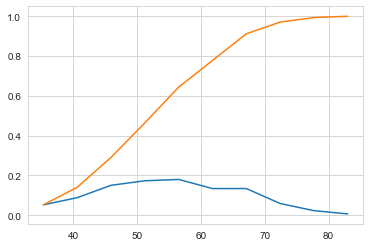

In [19]:
# numpy histogram returns 2 outputs
count , bin_edges = np.histogram(hman.age , bins = 10, density = True)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

print('Density and weights for a description (count) \n {} \n \n Bin edges \n {} \n \n PDF values \n {} \n \n CDF values \n {}'
      .format(count, bin_edges, pdf, cdf))

# plottong the PDF and CDF on Age
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);
plt.show();

Density and weights for a description (count) 
 [0.18716578 0.08318479 0.07724302 0.06833036 0.08912656 0.09209745
 0.08318479 0.08318479 0.07427213 0.07130125] 
 
 Bin edges 
 [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ] 
 
 PDF values 
 [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137] 
 
 CDF values 
 [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


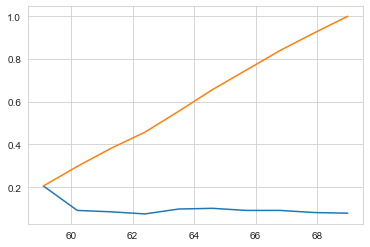

In [20]:
# numpy histogram returns 2 outputs
count , bin_edges = np.histogram(hman.Op_Year , bins = 10, density = True)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

print('Density and weights for a description (count) \n {} \n \n Bin edges \n {} \n \n PDF values \n {} \n \n CDF values \n {}'
      .format(count, bin_edges, pdf, cdf))

# plottong the PDF and CDF on Op_Year
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show();

Density and weights for a description (count) 
 [0.14831574 0.0188537  0.01131222 0.00502765 0.00565611 0.00125691
 0.00062846 0.         0.00062846 0.00062846] 
 
 Bin edges 
 [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ] 
 
 PDF values 
 [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797] 
 
 CDF values 
 [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


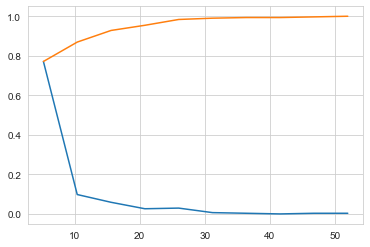

In [21]:
# numpy histogram returns 2 outputs
count , bin_edges = np.histogram(hman.axil_nodes , bins = 10, density = True)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

print('Density and weights for a description (count) \n {} \n \n Bin edges \n {} \n \n PDF values \n {} \n \n CDF values \n {}'
      .format(count, bin_edges, pdf, cdf))

# plottong the PDF and CDF on Op_Year
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show();

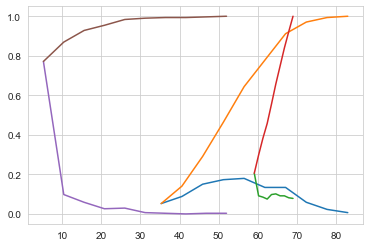

In [22]:
# AGE
count , bin_edges = np.histogram(hman.age , bins = 10, density = True)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

# plottong the PDF and CDF on Op_Year
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


# Op_Year
count , bin_edges = np.histogram(hman.Op_Year , bins = 10, density = True)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

# plottong the PDF and CDF on Op_Year
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


# numpy histogram returns 2 outputs
count , bin_edges = np.histogram(hman.axil_nodes , bins = 10, density = True)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

# plottong the PDF and CDF on Op_Year
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show();

### Multivariate analysis
Contor plots

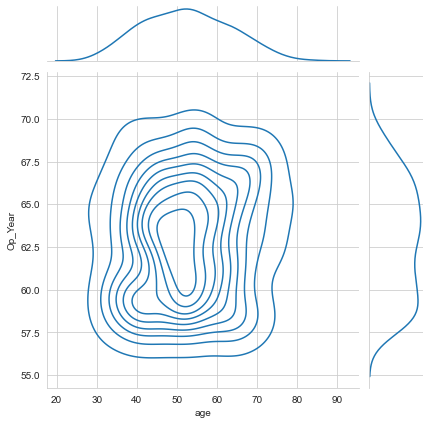

In [23]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="Op_Year", data=hman, kind="kde");
plt.show();

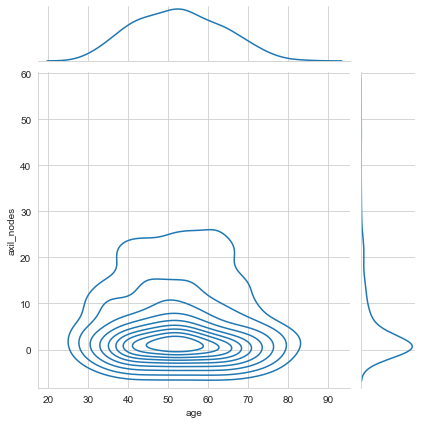

In [24]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="axil_nodes", data=hman, kind="kde");
plt.show();

Conclusions:

1. Patient’s age and operation year alone are not deciding factors for his/her survival. Yet, people less than 35 years have more chance of survival.
2. Survival chance is inversely proportional to the number of positive axillary nodes. We also saw that the absence of positive axillary nodes cannot always guarantee survival.